In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Capres2014-2.0.csv', encoding='latin1')

In [3]:
data.head()

,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1


In [21]:
data['Tanggal_Tweet'].value_counts()

9/24/2013 15:35     37
9/24/2013 15:36     22
9/14/2013 11:38     11
9/29/2013 11:07     10
9/9/2013 3:58        9
                    ..
11/19/2013 16:03     1
8/15/2013 6:36       1
9/27/2013 1:15       1
2/28/2014 8:36       1
9/8/2013 20:55       1
Name: Tanggal_Tweet, Length: 3021, dtype: int64

In [5]:
data['Sentimen'].value_counts()

 0    1467
 1    1124
-1     765
Name: Sentimen, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.Kandidat, data.Sentimen)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

vect.fit(X_train)
X_train_vec = vect.transform(X_train)

In [8]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
X_test_vec = vect.transform(X_test)

In [10]:
y_pred = nb.predict(X_test_vec)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.43      0.21      0.28       199
           0       0.47      0.71      0.56       342
           1       0.44      0.33      0.38       298

    accuracy                           0.46       839
   macro avg       0.45      0.42      0.41       839
weighted avg       0.45      0.46      0.43       839



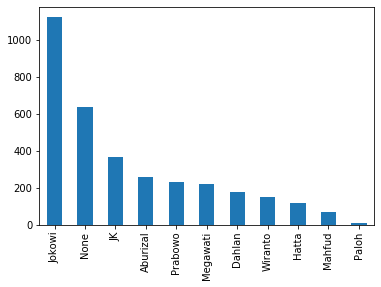

In [12]:
data.Kandidat.value_counts().plot(kind='bar');

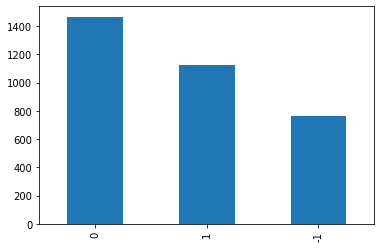

In [13]:
data.Sentimen.value_counts().plot(kind='bar');

In [14]:
data.Kandidat = data.Kandidat.map({'Jokowi':0, 'Prabowo':1, 'None':2, 'JK':3, 'Aburizal':4, 'Megawati':5, 'Dahlan':6, 'Wiranto':7, 'Hatta':8, 'Mahfud':9, 'Paloh':10})

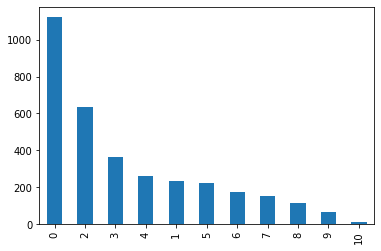

In [15]:
data.Kandidat.value_counts().plot(kind='bar');

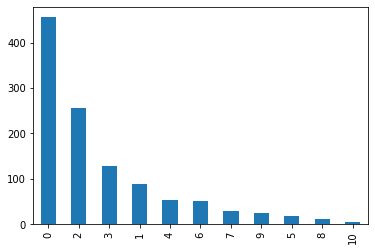

In [16]:
data[data.Sentimen == 1].Kandidat.value_counts().plot(kind='bar');

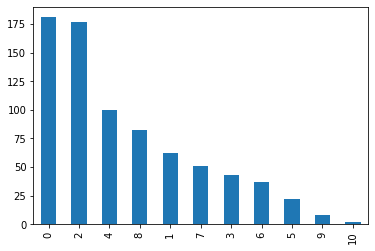

In [17]:
data[data.Sentimen == -1].Kandidat.value_counts().plot(kind='bar');

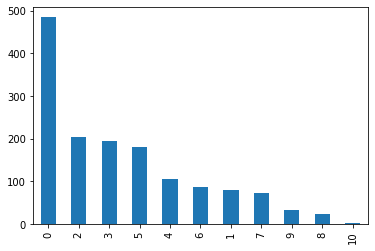

In [18]:
data[data.Sentimen == 0].Kandidat.value_counts().plot(kind='bar');

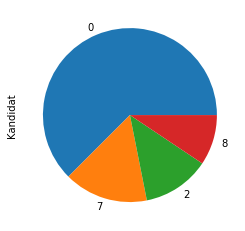

In [19]:
data[(data.Tweet_ID == 'despar54') & (data.Sentimen == 1)].Kandidat.value_counts().plot(kind='pie');

In [24]:
data['Tanggal'] = data['Tanggal_Tweet'].apply(lambda x : x.split(' ')[0])

In [26]:
data['Waktu'] = data['Tanggal_Tweet'].apply(lambda x : x.split(' ')[1])

In [27]:
data.head()

,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen,Tanggal,Waktu
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,0,web,BLITAR - INDONESIA,1,8/1/2013,0:33
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,0,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1,8/1/2013,4:11
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,0,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1,8/1/2013,4:32
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,1,web,Manado,1,8/1/2013,7:33
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,1,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1,8/1/2013,7:36


In [28]:
data['Tanggal'] = pd.to_datetime(data.Tanggal)

In [30]:
data['Waktu'] = pd.to_datetime(data.Waktu)

In [32]:
data['Tanggal_Tweet'] = pd.to_datetime(data.Waktu)

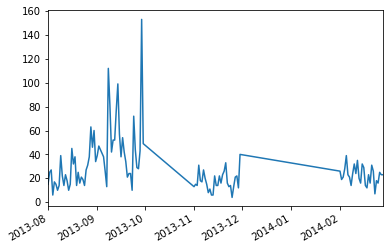

In [34]:
data['Tanggal'].value_counts().sort_index().plot();